In [1]:
import sys
print(sys.path)
sys.path.append('/home/zinovyev/anaconda3/lib/python3.7/site-packages')
sys.path.append('/mnt/c/MyPrograms/__github/DAPCA')

['/mnt/c/MyPrograms/Python/DAPCA', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/home/zinovyev/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/zinovyev/.local/lib/python3.7/site-packages/IPython/extensions', '/home/zinovyev/.ipython']


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from DAPCA import DAPCA

/home/zinovyev/anaconda3/lib/python3.7/site-packages/numba/core/errors.py:168: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [23]:
X = np.loadtxt('datasets/synthetic/2clusters/2clusters_3d/X.csv',delimiter=',')
Y = np.loadtxt('datasets/synthetic/2clusters/2clusters_3d/Y.csv',delimiter=',')
labels = np.loadtxt('datasets/synthetic/2clusters/2clusters_3d/labels.csv',delimiter=',')
cls = ['g','y','grey']
labels_c = [cls[int(i)-1] for i in labels]
labelsXY_c = labels_c + ['grey']*np.sum(Y.shape[0])
n_points1 = np.sum(labels==1.0)
n_points2 = np.sum(labels==2.0)

500


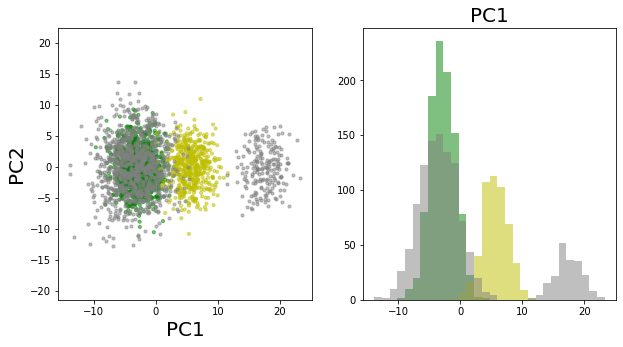

/mnt/c/MyPrograms/__github/DAPCA/DAPCA.py:277: UserWarning: Since matrix Y is empty the SPCA is used
  warnings.warn("Since matrix Y is empty the SPCA is used")
/mnt/c/MyPrograms/__github/DAPCA/DAPCA.py:616: UserWarning: All eigenvalues starting from 1 are negative
  warnings.warn(f"All eigenvalues starting from {ind} are negative")


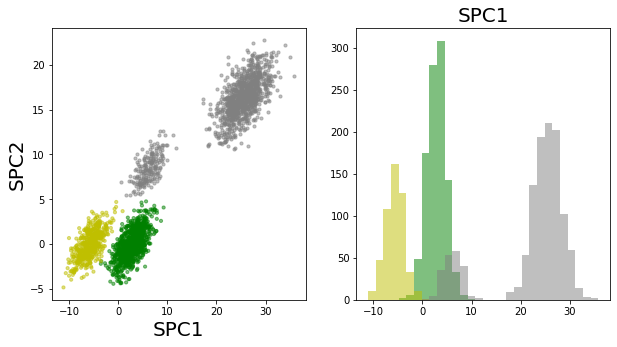

Iteration: 0 non-neg: 0 Hw: -3307.28796017568
Iteration: 1 non-neg: 0 Hw diff: -40.28724253069734 (-80.1043556666854)
Iteration: 2 non-neg: 0 Hw diff: -0.17478254388175213 (-68.18653893341158)
Iteration: 3 non-neg: 1 Hw diff: -0.16268311678404931 (-58.64584937124893)
Iteration: 4 non-neg: 1 Hw diff: -0.16074985618680454 (-50.524106514996454)
Iteration: 5 non-neg: 1 Hw diff: -0.1565440256037746 (-43.685415683696355)
Iteration: 6 non-neg: 1 Hw diff: -0.14018601013669343 (-38.31428845409096)
Iteration: 7 non-neg: 1 Hw diff: -0.14679205382735003 (-33.40997029602648)
Iteration: 8 non-neg: 1 Hw diff: -0.14064227553879785 (-29.29048923795572)
Iteration: 9 non-neg: 1 Hw diff: -0.13743601341505557 (-25.751329211050297)


/mnt/c/MyPrograms/__github/DAPCA/DAPCA.py:616: UserWarning: All eigenvalues starting from 1 are negative
  warnings.warn(f"All eigenvalues starting from {ind} are negative")


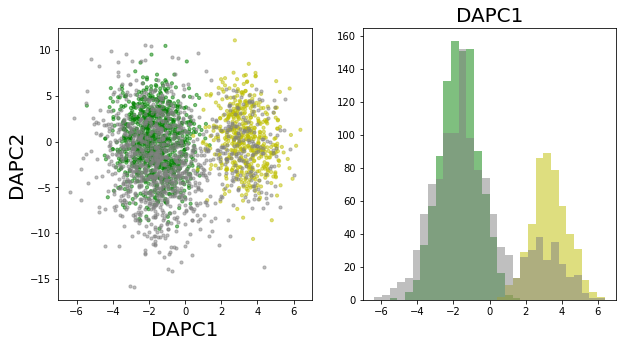

In [37]:
pca = PCA(svd_solver='full')
u = pca.fit_transform(X)
mn = np.mean(X,axis=0)
#PY = (Y-mn)@pca.components_
PY = pca.fit_transform(Y)

nbins = 30

plt.subplots(1,2,figsize=(10,5))

# Do PCA
plt.subplot(121)
plt.scatter(u[:,0],u[:,1],c=labels_c,alpha=0.5,s=10)
plt.scatter(PY[:,0],PY[:,1],c='grey',alpha=0.5,s=10)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.axis('equal')
plt.subplot(122)
rng = (np.min((np.min(u[:,0]),np.min(PY[:,0]))),np.max((np.max(u[:,0]),np.max(PY[:,0]))))
plt.hist(u[0:n_points1,0],bins=nbins,color='g',alpha=0.5,range=rng)
plt.hist(u[n_points1:n_points1+n_points2,0],bins=nbins,color='y',alpha=0.5,range=rng)
#plt.hist(u[n_points[0]+n_points[1]:,0],bins=nbins,color='grey',alpha=0.5,density=True)
plt.hist(PY[:,0],bins=nbins,color='grey',alpha=0.5,range=rng)
plt.title('PC1',fontsize=20)
plt.show()

# ======================= PARAMETERS OF DAPCA ===========================
alpha = 1
num_comps = 2
gamma = 200
maxIter = 10
beta = 1
kNN = 1
# =======================================================================

[V1, D1, PX, PY, kNNs] = DAPCA(X, labels, 2, alpha=alpha)
PX_SPCA = PX.copy()
V1_SPCA = V1.copy()

plt.subplots(1,2,figsize=(10,5))

mn = np.mean(X,axis=0)
PY = (Y-mn)@V1

if num_comps>1:
    plt.subplot(121)
    plt.scatter(PX[:,0],PX[:,1],c=labels_c,alpha=0.5,s=10)
    plt.scatter(PY[:,0],PY[:,1],c='grey',alpha=0.5,s=10)
    plt.xlabel('SPC1',fontsize=20)
    plt.ylabel('SPC2',fontsize=20)
    #plt.axis('equal')

plt.subplot(122)
rng = (np.min((np.min(PX[:,0]),np.min(PY[:,0]))),np.max((np.max(PX[:,0]),np.max(PY[:,0]))))
plt.hist(PX[:n_points1,0],bins=nbins,color='g',alpha=0.5,range=rng)
plt.hist(PX[n_points1:n_points1+n_points2,0],bins=nbins,color='y',alpha=0.5,range=rng)
plt.hist(PY[:,0],bins=nbins,color='grey',alpha=0.5,range=rng)
plt.title('SPC1',fontsize=20)
plt.show()


initialV = pca.components_[:num_comps,:].T
if num_comps==1:
    initialV = initialV.reshape(-1,1)
    
plt.subplots(1,2,figsize=(10,5))

[V1, D1, PX, PY, kNNs] = DAPCA(X, labels, num_comps,  YY=Y, 
                         alpha=alpha, gamma=gamma,maxIter=maxIter,
                               beta=beta,verbose='all',kNN=kNN,
                               initialV = initialV,eps=1e-10)                                   


if PX.shape[1]>1:
    plt.subplot(121)
    plt.scatter(PX[:,0],PX[:,1],c=labels_c,alpha=0.5,s=10)
    plt.scatter(PY[:,0],PY[:,1],c='grey',alpha=0.5,s=10)
    plt.xlabel('DAPC1',fontsize=20)
    plt.ylabel('DAPC2',fontsize=20)
    #plt.axis('equal')

plt.subplot(122)
rng = (np.min((np.min(PX[:,0]),np.min(PY[:,0]))),np.max((np.max(PX[:,0]),np.max(PY[:,0]))))
plt.hist(PX[:n_points1,0],bins=nbins,color='g',alpha=0.5,range=rng)
plt.hist(PX[n_points1:n_points1+n_points2,0],bins=nbins,color='y',alpha=0.5,range=rng)
plt.hist(PY[:,0],bins=nbins,color='grey',alpha=0.5,range=rng)
plt.title('DAPC1',fontsize=20)
plt.show()
